# PER

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,632 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 156210 files and d

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
ls -all ../gdrive/MyDrive/PER_Provement/jongmok_upjong/

total 614
-rw------- 1 root root 57194 Mar 26 10:35 jongmok_upjong_2011.xlsx
-rw------- 1 root root 58002 Mar 26 10:29 jongmok_upjong_2012.xlsx
-rw------- 1 root root 57383 Mar 26 10:29 jongmok_upjong_2013.xlsx
-rw------- 1 root root 57065 Mar 26 10:30 jongmok_upjong_2014.xlsx
-rw------- 1 root root 55940 Mar 26 10:31 jongmok_upjong_2015.xlsx
-rw------- 1 root root 55725 Mar 26 10:31 jongmok_upjong_2016.xlsx
-rw------- 1 root root 55936 Mar 26 10:31 jongmok_upjong_2017.xlsx
-rw------- 1 root root 55609 Mar 26 10:31 jongmok_upjong_2018.xlsx
-rw------- 1 root root 56859 Mar 26 10:32 jongmok_upjong_2019.xlsx
-rw------- 1 root root 57558 Mar 26 10:32 jongmok_upjong_2020.xlsx
-rw------- 1 root root 58027 Mar 26 11:51 jongmok_upjong_2021.xlsx


In [ ]:
# for문 돌려서 엑셀파일 열기위한 경로 설정
import os

PATH = '../gdrive/MyDrive/PER_Provement/price_per/'

file_list= []
for (root, directories, files) in os.walk(PATH):
    for file in files:
#         print(files)
        file_path = os.path.join(root, file)
        file_list.append(file_path)

In [ ]:
for file in file_list:
  # print(file[-13:-9])
  df = pd.read_excel(file)[['종목코드', '종목명','PER']]
  exec(f'per_{file[-13:-9]} =df')

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
# for문 돌려서 엑셀파일 열기위한 경로 설정
import os

PATH = '../gdrive/MyDrive/PER_Provement/jongmok_upjong/'

file_list= []
for (root, directories, files) in os.walk(PATH):
    for file in files:
#         print(files)
        file_path = os.path.join(root, file)
        file_list.append(file_path)

In [ ]:
for file in file_list:
  # print(file[-9:-5])
  df = pd.read_excel(file)[['종목코드', '종목명','업종명','종가']]
  exec(f'jongmok_upjong{file[-9:-5]} =df')

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
# for문 돌려서 엑셀파일 열기위한 경로 설정
import os

PATH = '../gdrive/MyDrive/PER_Provement/upjong/'

file_list= []
for (root, directories, files) in os.walk(PATH):
    for file in files:
#         print(files)
        file_path = os.path.join(root, file)
        file_list.append(file_path)

In [ ]:
for file in file_list:
  # print(file[-19:-15])
  df = pd.read_excel(file)[['지수명','PER']]
  df = df.rename(columns = {'지수명':'업종명',
                       'PER':'업종PER'})
  exec(f'upjong{file[-19:-15]} =df')

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
lower_per_returns = []
upper_per_returns = []
under5_per_returns = []
upper5_per_returns = []
under2_per_returns = []
upper10_per_returns = []
upper50_per_returns= []
per_returns_corr = []

## 2011

In [ ]:
join_t1 = pd.merge(per_2011,jongmok_upjong2011,how='left',on='종목코드')[['종목코드','종목명_x','업종명','PER','종가']]
join_t1.columns = ['종목코드','종목명','업종명','PER','종가']
join_t2 = pd.merge(join_t1,upjong2011,how='left',on='업종명')

In [ ]:
join_t2['PER'] = join_t2['PER'].apply(lambda x : '0' if x=='-' else x)
join_t2['PER'] = join_t2['PER'].astype(float)

In [ ]:
join_t2['업종PER'] = join_t2['업종PER'].apply(lambda x : '0' if x =='-' else x)
join_t2['업종PER'] = join_t2['업종PER'].astype(float)

In [ ]:
join_t2 = join_t2.loc[~((join_t2['업종PER']==0) | (join_t2['PER']==0))] # PER이나 업종PER이 0인 종목을 제외한 종목(872종목에서 >>540종목)

In [ ]:
lower_upjong = join_t2.loc[join_t2['PER'] <join_t2['업종PER']] # 업종per보다 낮은 per주식
comp1112 = pd.merge(lower_upjong, jongmok_upjong2012, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
lower_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

-9.93640617697738


In [ ]:
over_upjong = join_t2.loc[join_t2['PER'] >join_t2['업종PER']] # 업종per보다 높은 per주식
comp1112 = pd.merge(over_upjong, jongmok_upjong2012, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

-8.896342623052472


In [ ]:
under5_upjong = join_t2.loc[join_t2['PER'] <5] # per이 5보다 낮은 주식
comp1112 = pd.merge(under5_upjong, jongmok_upjong2012, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
under5_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

-8.662656246209274


In [ ]:
upper5_upjong = join_t2.loc[join_t2['PER'] >5] # per이 5보다 높은 주식
comp1112 = pd.merge(upper5_upjong, jongmok_upjong2012, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper5_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

-9.445219590824411


In [ ]:
under2_per = join_t2.loc[join_t2['PER'] <2] # per이 2보다 낮은 주식
comp1112 = pd.merge(under2_per, jongmok_upjong2012, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
under2_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

-21.68327961566329


In [ ]:
upper10_per = join_t2.loc[join_t2['PER'] > 10] # per이 10보다 높은 주식
comp1112 = pd.merge(upper10_per, jongmok_upjong2012, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper10_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

-9.894985843049584


In [ ]:
upper50_per = join_t2.loc[join_t2['PER'] > 50] # per이 50보다 높은 주식
comp1112 = pd.merge(upper50_per, jongmok_upjong2012, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper50_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

-10.098507137310216


In [ ]:
a = pd.merge(join_t2.sort_values('PER'), jongmok_upjong2012, how='left', on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '업종PER','종가_x','종가_y']]
a.columns = ['종목코드', '종목명', '업종명', 'PER', '업종PER','종가','다음해종가']
a['증가율'] = ((a['다음해종가']-a['종가'])/a['종가'])*100
a = a.loc[~a['다음해종가'].isnull()]
per_returns_corr_score = a.corr()['증가율'].to_frame()
per_returns_corr.append(per_returns_corr_score.loc[(per_returns_corr_score.index=='PER')]['증가율'].values)

In [ ]:
per_return_corr = a.sort_values('PER')[['PER','증가율']]
per_return_corr.to_excel('per_return_corr_2011.xlsx')

## 2012

In [ ]:
join_t1 = pd.merge(per_2012,jongmok_upjong2012,how='left',on='종목코드')[['종목코드','종목명_x','업종명','PER','종가']]
join_t1.columns = ['종목코드','종목명','업종명','PER','종가']
join_t2 = pd.merge(join_t1,upjong2012,how='left',on='업종명')

In [ ]:
join_t2['PER'] = join_t2['PER'].apply(lambda x : '0' if x=='-' else x)
join_t2['PER'] = join_t2['PER'].astype(float)

In [ ]:
join_t2['업종PER'] = join_t2['업종PER'].apply(lambda x : '0' if x =='-' else x)
join_t2['업종PER'] = join_t2['업종PER'].astype(float)

In [ ]:
join_t2 = join_t2.loc[~((join_t2['업종PER']==0) | (join_t2['PER']==0))] # PER이나 업종PER이 0인 종목을 제외한 종목

In [ ]:
lower_upjong = join_t2.loc[join_t2['PER'] <join_t2['업종PER']] # 업종per보다 낮은 per주식
comp1112 = pd.merge(lower_upjong, jongmok_upjong2013, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
lower_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

11.540480869645632


In [ ]:
over_upjong = join_t2.loc[join_t2['PER'] >join_t2['업종PER']] # 업종per보다 높은 per주식
comp1112 = pd.merge(over_upjong, jongmok_upjong2013, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

11.874874336251366


In [ ]:
under5_upjong = join_t2.loc[join_t2['PER'] <5] # per이 5보다 낮은 주식
comp1112 = pd.merge(under5_upjong, jongmok_upjong2013, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
under5_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

6.984259260399292


In [ ]:
upper5_upjong = join_t2.loc[join_t2['PER'] >5] # per이 5보다 높 주식
comp1112 = pd.merge(upper5_upjong, jongmok_upjong2013, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper5_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

12.383764949117719


In [ ]:
under2_per = join_t2.loc[join_t2['PER'] <2] # per이 2보다 낮은 주식
comp1112 = pd.merge(under2_per, jongmok_upjong2013, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
under2_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

-20.391073352394812


In [ ]:
upper10_per = join_t2.loc[join_t2['PER'] > 10] # per이 10보다 높은 주식
comp1112 = pd.merge(upper10_per, jongmok_upjong2013, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper10_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

12.269200007513922


In [ ]:
upper50_per = join_t2.loc[join_t2['PER'] > 50] # per이 50보다 높은 주식
comp1112 = pd.merge(upper50_per, jongmok_upjong2013, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper50_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

1.5088667850308122


In [ ]:
a = pd.merge(join_t2.sort_values('PER'), jongmok_upjong2013, how='left', on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '업종PER','종가_x','종가_y']]
a.columns = ['종목코드', '종목명', '업종명', 'PER', '업종PER','종가','다음해종가']
a['증가율'] = ((a['다음해종가']-a['종가'])/a['종가'])*100
a = a.loc[~a['다음해종가'].isnull()]
per_returns_corr_score = a.corr()['증가율'].to_frame()
per_returns_corr.append(per_returns_corr_score.loc[(per_returns_corr_score.index=='PER')]['증가율'].values)
per_returns_corr_score

,증가율
PER,-0.022766
업종PER,0.074754
종가,-0.009822
다음해종가,0.048244
증가율,1.000000


## 2013

In [ ]:
join_t1 = pd.merge(per_2013,jongmok_upjong2013,how='left',on='종목코드')[['종목코드','종목명_x','업종명','PER','종가']]
join_t1.columns = ['종목코드','종목명','업종명','PER','종가']
join_t2 = pd.merge(join_t1,upjong2013,how='left',on='업종명')

In [ ]:
join_t2['PER'] = join_t2['PER'].apply(lambda x : '0' if x=='-' else x)
join_t2['PER'] = join_t2['PER'].astype(float)

In [ ]:
join_t2['업종PER'] = join_t2['업종PER'].apply(lambda x : '0' if x =='-' else x)
join_t2['업종PER'] = join_t2['업종PER'].astype(float)
print('전처리하기전 코스피종목 갯수 : {}'.format(len(join_t2)))

전처리하기전 코스피종목 갯수 : 875


In [ ]:
join_t2 = join_t2.loc[~((join_t2['업종PER']==0) | (join_t2['PER']==0))] # PER이나 업종PER이 0인 종목을 제외한 종목
print('전처리 후 코스피 종목 갯수 : {}'.format(len(join_t2)))

전처리 후 코스피 종목 갯수 : 478


In [ ]:
lower_upjong = join_t2.loc[join_t2['PER'] <join_t2['업종PER']] # 업종per보다 낮은 per주식
comp1112 = pd.merge(lower_upjong, jongmok_upjong2014, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
lower_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

11.629017714814093


In [ ]:
over_upjong = join_t2.loc[join_t2['PER'] >join_t2['업종PER']] # 업종per보다 높은 per주식
comp1112 = pd.merge(over_upjong, jongmok_upjong2014, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

9.260826185540646


In [ ]:
under5_upjong = join_t2.loc[join_t2['PER'] <5] # per이 5보다 낮은 주식
comp1112 = pd.merge(under5_upjong, jongmok_upjong2014, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
under5_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

11.603223708993731


In [ ]:
upper5_upjong = join_t2.loc[join_t2['PER'] >5] # per이 5보다 높은 주식
comp1112 = pd.merge(upper5_upjong, jongmok_upjong2014, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper5_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

11.13692364098494


In [ ]:
under2_per = join_t2.loc[join_t2['PER'] <2] # per이 2보다 낮은 주식
comp1112 = pd.merge(under2_per, jongmok_upjong2014, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
under2_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

31.476421225880774


In [ ]:
upper10_per = join_t2.loc[join_t2['PER'] > 10] # per이 10보다 높은 주식
comp1112 = pd.merge(upper10_per, jongmok_upjong2014, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper10_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

9.23919314953821


In [ ]:
upper50_per = join_t2.loc[join_t2['PER'] > 50] # per이 50보다 높은 주식
comp1112 = pd.merge(upper50_per, jongmok_upjong2014, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper50_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

-8.728727021062106


In [ ]:
a = pd.merge(join_t2.sort_values('PER'), jongmok_upjong2014, how='left', on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '업종PER','종가_x','종가_y']]
a.columns = ['종목코드', '종목명', '업종명', 'PER', '업종PER','종가','다음해종가']
a['증가율'] = ((a['다음해종가']-a['종가'])/a['종가'])*100
a = a.loc[~a['다음해종가'].isnull()]
per_returns_corr_score = a.corr()['증가율'].to_frame()
per_returns_corr.append(per_returns_corr_score.loc[(per_returns_corr_score.index=='PER')]['증가율'].values)
per_returns_corr_score

,증가율
PER,-0.020609
업종PER,-0.064108
종가,-0.023851
다음해종가,0.026693
증가율,1.000000


## 2014

In [ ]:
join_t1 = pd.merge(per_2014,jongmok_upjong2014,how='left',on='종목코드')[['종목코드','종목명_x','업종명','PER','종가']]
join_t1.columns = ['종목코드','종목명','업종명','PER','종가']
join_t2 = pd.merge(join_t1,upjong2014,how='left',on='업종명')

In [ ]:
join_t2['PER'] = join_t2['PER'].apply(lambda x : '0' if x=='-' else x)
join_t2['PER'] = join_t2['PER'].astype(float)

In [ ]:
join_t2['업종PER'] = join_t2['업종PER'].apply(lambda x : '0' if x =='-' else x)
join_t2['업종PER'] = join_t2['업종PER'].astype(float)
print('전처리하기전 코스피종목 갯수 : {}'.format(len(join_t2)))

전처리하기전 코스피종목 갯수 : 865


In [ ]:
join_t2 = join_t2.loc[~((join_t2['업종PER']==0) | (join_t2['PER']==0))] # PER이나 업종PER이 0인 종목을 제외한 종목
print('전처리한후 코스피종목 갯수 : {}'.format(len(join_t2)))

전처리한후 코스피종목 갯수 : 478


In [ ]:
lower_upjong = join_t2.loc[join_t2['PER'] <join_t2['업종PER']] # 업종per보다 낮은 per주식
comp1112 = pd.merge(lower_upjong, jongmok_upjong2015, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
lower_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

17.420328337400665


In [ ]:
over_upjong = join_t2.loc[join_t2['PER'] >join_t2['업종PER']] # 업종per보다 높은 per주식
comp1112 = pd.merge(over_upjong, jongmok_upjong2015, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

10.820204943058421


In [ ]:
under5_upjong = join_t2.loc[join_t2['PER'] <5] # per이 5보다 낮은 주식
comp1112 = pd.merge(under5_upjong, jongmok_upjong2015, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
under5_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

31.989253749232844


In [ ]:
upper5_upjong = join_t2.loc[join_t2['PER'] >5] # per이 5보다 높은 주식
comp1112 = pd.merge(upper5_upjong, jongmok_upjong2015, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper5_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

14.546840649306564


In [ ]:
under2_per = join_t2.loc[join_t2['PER'] <2] # per이 2보다 낮은 주식
comp1112 = pd.merge(under2_per, jongmok_upjong2015, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
under2_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

125.5068937878262


In [ ]:
upper10_per = join_t2.loc[join_t2['PER'] > 10] # per이 10보다 높은 주식
comp1112 = pd.merge(upper10_per, jongmok_upjong2015, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper10_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

15.711435539831388


In [ ]:
upper50_per = join_t2.loc[join_t2['PER'] > 50] # per이 50보다 높은 주식
comp1112 = pd.merge(upper50_per, jongmok_upjong2015, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper50_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

16.168389276421554


In [ ]:
a = pd.merge(join_t2.sort_values('PER'), jongmok_upjong2015, how='left', on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '업종PER','종가_x','종가_y']]
a.columns = ['종목코드', '종목명', '업종명', 'PER', '업종PER','종가','다음해종가']
a['증가율'] = ((a['다음해종가']-a['종가'])/a['종가'])*100
a = a.loc[~a['다음해종가'].isnull()]
per_returns_corr_score = a.corr()['증가율'].to_frame()
per_returns_corr.append(per_returns_corr_score.loc[(per_returns_corr_score.index=='PER')]['증가율'].values)
per_returns_corr_score

,증가율
PER,-0.002522
업종PER,0.064296
종가,-0.067351
다음해종가,0.042115
증가율,1.000000


## 2015

In [ ]:
join_t1 = pd.merge(per_2015,jongmok_upjong2015,how='left',on='종목코드')[['종목코드','종목명_x','업종명','PER','종가']]
join_t1.columns = ['종목코드','종목명','업종명','PER','종가']
join_t2 = pd.merge(join_t1,upjong2015,how='left',on='업종명')

In [ ]:
join_t2['PER'] = join_t2['PER'].apply(lambda x : '0' if x=='-' else x)
join_t2['PER'] = join_t2['PER'].astype(float)

In [ ]:
join_t2['업종PER'] = join_t2['업종PER'].apply(lambda x : '0' if x =='-' else x)
join_t2['업종PER'] = join_t2['업종PER'].astype(float)
print('전처리하기전 코스피종목 갯수 : {}'.format(len(join_t2)))

전처리하기전 코스피종목 갯수 : 854


In [ ]:
join_t2 = join_t2.loc[~((join_t2['업종PER']==0) | (join_t2['PER']==0))] # PER이나 업종PER이 0인 종목을 제외한 종목
print('전처리한 후 코스피종목 갯수 : {}'.format(len(join_t2)))

전처리한 후 코스피종목 갯수 : 462


In [ ]:
lower_upjong = join_t2.loc[join_t2['PER'] <join_t2['업종PER']] # 업종per보다 낮은 per주식
comp1112 = pd.merge(lower_upjong, jongmok_upjong2016, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
lower_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

17.31364590544647


In [ ]:
over_upjong = join_t2.loc[join_t2['PER'] >join_t2['업종PER']] # 업종per보다 높은 per주식
comp1112 = pd.merge(over_upjong, jongmok_upjong2016, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

26.524748599046635


In [ ]:
under5_upjong = join_t2.loc[join_t2['PER'] <5] # per이 5보다 낮은 주식
comp1112 = pd.merge(under5_upjong, jongmok_upjong2016, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
under5_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

5.730258780045163


In [ ]:
upper5_upjong = join_t2.loc[join_t2['PER'] >5] # per이 5보다 높은 주식
comp1112 = pd.merge(upper5_upjong, jongmok_upjong2016, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper5_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

20.150534026797704


In [ ]:
under2_per = join_t2.loc[join_t2['PER'] <2] # per이 2보다 낮은 주식
comp1112 = pd.merge(under2_per, jongmok_upjong2016, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
under2_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

74.06916050456721


In [ ]:
upper10_per = join_t2.loc[join_t2['PER'] > 10] # per이 10보다 높은 주식
comp1112 = pd.merge(upper10_per, jongmok_upjong2016, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper10_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

22.620873665162144


In [ ]:
upper50_per = join_t2.loc[join_t2['PER'] > 50] # per이 50보다 높은 주식
comp1112 = pd.merge(upper50_per, jongmok_upjong2016, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper50_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

38.92470310240743


In [ ]:
a = pd.merge(join_t2.sort_values('PER'), jongmok_upjong2016, how='left', on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '업종PER','종가_x','종가_y']]
a.columns = ['종목코드', '종목명', '업종명', 'PER', '업종PER','종가','다음해종가']
a['증가율'] = ((a['다음해종가']-a['종가'])/a['종가'])*100
a = a.loc[~a['다음해종가'].isnull()]
per_returns_corr_score = a.corr()['증가율'].to_frame()
per_returns_corr.append(per_returns_corr_score.loc[(per_returns_corr_score.index=='PER')]['증가율'].values)
per_returns_corr_score

,증가율
PER,0.055175
업종PER,-0.000510
종가,-0.069650
다음해종가,0.129370
증가율,1.000000


## 2016

In [ ]:
join_t1 = pd.merge(per_2016,jongmok_upjong2016,how='left',on='종목코드')[['종목코드','종목명_x','업종명','PER','종가']]
join_t1.columns = ['종목코드','종목명','업종명','PER','종가']
join_t2 = pd.merge(join_t1,upjong2016,how='left',on='업종명')

In [ ]:
join_t2['PER'] = join_t2['PER'].apply(lambda x : '0' if x=='-' else x)
join_t2['PER'] = join_t2['PER'].astype(float)

In [ ]:
join_t2['업종PER'] = join_t2['업종PER'].apply(lambda x : '0' if x =='-' else x)
join_t2['업종PER'] = join_t2['업종PER'].astype(float)
print('전처리하기전 코스피종목 갯수 : {}'.format(len(join_t2)))

전처리하기전 코스피종목 갯수 : 854


In [ ]:
join_t2 = join_t2.loc[~((join_t2['업종PER']==0) | (join_t2['PER']==0))] # PER이나 업종PER이 0인 종목을 제외한 종목
print('전처리한 후 코스피종목 갯수 : {}'.format(len(join_t2)))

전처리한 후 코스피종목 갯수 : 520


In [ ]:
lower_upjong = join_t2.loc[join_t2['PER'] <join_t2['업종PER']] # 업종per보다 낮은 per주식
comp1112 = pd.merge(lower_upjong, jongmok_upjong2017, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
lower_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

0.785353294295222


In [ ]:
over_upjong = join_t2.loc[join_t2['PER'] >join_t2['업종PER']] # 업종per보다 높은 per주식
comp1112 = pd.merge(over_upjong, jongmok_upjong2017, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

-2.386812112363449


In [ ]:
under5_upjong = join_t2.loc[join_t2['PER'] <5] # per이 5보다 낮은 주식
comp1112 = pd.merge(under5_upjong, jongmok_upjong2017, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
under5_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

8.981945836015784


In [ ]:
upper5_upjong = join_t2.loc[join_t2['PER'] >5] # per이 5보다 높은 주식
comp1112 = pd.merge(upper5_upjong, jongmok_upjong2017, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper5_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

-0.8114665607268426


In [ ]:
under2_per = join_t2.loc[join_t2['PER'] <2] # per이 2보다 낮은 주식
comp1112 = pd.merge(under2_per, jongmok_upjong2017, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
under2_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

6.21421606788851


In [ ]:
upper10_per = join_t2.loc[join_t2['PER'] > 10] # per이 10보다 높은 주식
comp1112 = pd.merge(upper10_per, jongmok_upjong2017, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper10_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

-4.339777682446451


In [ ]:
upper50_per = join_t2.loc[join_t2['PER'] > 50] # per이 50보다 높은 주식
comp1112 = pd.merge(upper50_per, jongmok_upjong2017, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper50_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

-0.48972332761779863


In [ ]:
a = pd.merge(join_t2.sort_values('PER'), jongmok_upjong2017, how='left', on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '업종PER','종가_x','종가_y']]
a.columns = ['종목코드', '종목명', '업종명', 'PER', '업종PER','종가','다음해종가']
a['증가율'] = ((a['다음해종가']-a['종가'])/a['종가'])*100
a = a.loc[~a['다음해종가'].isnull()]
per_returns_corr_score = a.corr()['증가율'].to_frame()
per_returns_corr.append(per_returns_corr_score.loc[(per_returns_corr_score.index=='PER')]['증가율'].values)
per_returns_corr_score

,증가율
PER,0.030368
업종PER,-0.032399
종가,-0.143685
다음해종가,-0.018487
증가율,1.000000


## 2017

In [ ]:
join_t1 = pd.merge(per_2017,jongmok_upjong2017,how='left',on='종목코드')[['종목코드','종목명_x','업종명','PER','종가']]
join_t1.columns = ['종목코드','종목명','업종명','PER','종가']
join_t2 = pd.merge(join_t1,upjong2017,how='left',on='업종명')

In [ ]:
join_t2['PER'] = join_t2['PER'].apply(lambda x : '0' if x=='-' else x)
join_t2['PER'] = join_t2['PER'].astype(float)

In [ ]:
join_t2['업종PER'] = join_t2['업종PER'].apply(lambda x : '0' if x =='-' else x)
join_t2['업종PER'] = join_t2['업종PER'].astype(float)
print('전처리하기전 코스피종목 갯수 : {}'.format(len(join_t2)))

전처리하기전 코스피종목 갯수 : 861


In [ ]:
join_t2 = join_t2.loc[~((join_t2['업종PER']==0) | (join_t2['PER']==0))] # PER이나 업종PER이 0인 종목을 제외한 종목
print('전처리한 후 코스피종목 갯수 : {}'.format(len(join_t2)))

전처리한 후 코스피종목 갯수 : 546


In [ ]:
lower_upjong = join_t2.loc[join_t2['PER'] <join_t2['업종PER']] # 업종per보다 낮은 per주식
comp1112 = pd.merge(lower_upjong, jongmok_upjong2018, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
lower_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

0.6956351859726657


In [ ]:
over_upjong = join_t2.loc[join_t2['PER'] >join_t2['업종PER']] # 업종per보다 높은 per주식
comp1112 = pd.merge(over_upjong, jongmok_upjong2018, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

6.730046454082523


In [ ]:
under5_upjong = join_t2.loc[join_t2['PER'] <5] # per이 5보다 낮은 주식
comp1112 = pd.merge(under5_upjong, jongmok_upjong2018, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
under5_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

3.0858821474118465


In [ ]:
upper5_upjong = join_t2.loc[join_t2['PER'] >5] # per이 5보다 높은 주식
comp1112 = pd.merge(upper5_upjong, jongmok_upjong2018, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper5_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

3.374405575420916


In [ ]:
under2_per = join_t2.loc[join_t2['PER'] <2] # per이 2보다 낮은 주식
comp1112 = pd.merge(under2_per, jongmok_upjong2018, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
under2_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

-13.63445687899344


In [ ]:
upper10_per = join_t2.loc[join_t2['PER'] > 10] # per이 10보다 높은 주식
comp1112 = pd.merge(upper10_per, jongmok_upjong2018, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper10_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

3.2243508240889525


In [ ]:
upper50_per = join_t2.loc[join_t2['PER'] > 50] # per이 50보다 높은 주식
comp1112 = pd.merge(upper50_per, jongmok_upjong2018, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper50_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

2.985909570117709


In [ ]:
a = pd.merge(join_t2.sort_values('PER'), jongmok_upjong2018, how='left', on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '업종PER','종가_x','종가_y']]
a.columns = ['종목코드', '종목명', '업종명', 'PER', '업종PER','종가','다음해종가']
a['증가율'] = ((a['다음해종가']-a['종가'])/a['종가'])*100
a = a.loc[~a['다음해종가'].isnull()]
per_returns_corr_score = a.corr()['증가율'].to_frame()
per_returns_corr.append(per_returns_corr_score.loc[(per_returns_corr_score.index=='PER')]['증가율'].values)
per_returns_corr_score

,증가율
PER,-0.008191
업종PER,-0.113499
종가,0.052926
다음해종가,0.178212
증가율,1.000000


In [ ]:
per_return_corr = a.sort_values('PER')[['PER','증가율']]
per_return_corr.to_excel('per_return_corr_2017.xlsx')

## 2018

In [ ]:
join_t1 = pd.merge(per_2018,jongmok_upjong2018,how='left',on='종목코드')[['종목코드','종목명_x','업종명','PER','종가']]
join_t1.columns = ['종목코드','종목명','업종명','PER','종가']
join_t2 = pd.merge(join_t1,upjong2018,how='left',on='업종명')

In [ ]:
join_t2['PER'] = join_t2['PER'].apply(lambda x : '0' if x=='-' else x)
join_t2['PER'] = join_t2['PER'].astype(float)

In [ ]:
join_t2['업종PER'] = join_t2['업종PER'].apply(lambda x : '0' if x =='-' else x)
join_t2['업종PER'] = join_t2['업종PER'].astype(float)
print('전처리하기전 코스피종목 갯수 : {}'.format(len(join_t2)))

전처리하기전 코스피종목 갯수 : 869


In [ ]:
join_t2 = join_t2.loc[~((join_t2['업종PER']==0) | (join_t2['PER']==0))] # PER이나 업종PER이 0인 종목을 제외한 종목
print('전처리한 후 코스피종목 갯수 : {}'.format(len(join_t2)))

전처리한 후 코스피종목 갯수 : 592


In [ ]:
lower_upjong = join_t2.loc[join_t2['PER'] <join_t2['업종PER']] # 업종per보다 낮은 per주식
comp1112 = pd.merge(lower_upjong, jongmok_upjong2019, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
lower_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

-11.763422980142725


In [ ]:
over_upjong = join_t2.loc[join_t2['PER'] >join_t2['업종PER']] # 업종per보다 높은 per주식
comp1112 = pd.merge(over_upjong, jongmok_upjong2019, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

-8.303079915099804


In [ ]:
under5_upjong = join_t2.loc[join_t2['PER'] <5] # per이 5보다 낮은 주식
comp1112 = pd.merge(under5_upjong, jongmok_upjong2019, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
under5_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

-15.443632030794197


In [ ]:
upper5_upjong = join_t2.loc[join_t2['PER'] >5] # per이 5보다 낮은 주식
comp1112 = pd.merge(upper5_upjong, jongmok_upjong2019, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper5_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

-11.40420608826911


In [ ]:
under2_per = join_t2.loc[join_t2['PER'] <2] # per이 2보다 낮은 주식
comp1112 = pd.merge(under2_per, jongmok_upjong2019, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
under2_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

-5.990935973309195


In [ ]:
upper10_per = join_t2.loc[join_t2['PER'] > 10] # per이 10보다 높은 주식
comp1112 = pd.merge(upper10_per, jongmok_upjong2019, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper10_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

-12.114436183504704


In [ ]:
upper50_per = join_t2.loc[join_t2['PER'] > 50] # per이 50보다 높은 주식
comp1112 = pd.merge(upper50_per, jongmok_upjong2019, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper50_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

-7.539355612914269


In [ ]:
a = pd.merge(join_t2.sort_values('PER'), jongmok_upjong2019, how='left', on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '업종PER','종가_x','종가_y']]
a.columns = ['종목코드', '종목명', '업종명', 'PER', '업종PER','종가','다음해종가']
a['증가율'] = ((a['다음해종가']-a['종가'])/a['종가'])*100
a = a.loc[~a['다음해종가'].isnull()]
per_returns_corr_score = a.corr()['증가율'].to_frame()
per_returns_corr.append(per_returns_corr_score.loc[(per_returns_corr_score.index=='PER')]['증가율'].values)
per_returns_corr_score

,증가율
PER,0.003788
업종PER,0.073466
종가,-0.117195
다음해종가,0.031222
증가율,1.000000


In [ ]:
per_return_corr = a.sort_values('PER')[['PER','증가율']]
per_return_corr.to_excel('per_return_corr_2018.xlsx')

## 2019

In [ ]:
join_t1 = pd.merge(per_2019,jongmok_upjong2019,how='left',on='종목코드')[['종목코드','종목명_x','업종명','PER','종가']]
join_t1.columns = ['종목코드','종목명','업종명','PER','종가']
join_t2 = pd.merge(join_t1,upjong2019,how='left',on='업종명')

In [ ]:
join_t2['PER'] = join_t2['PER'].apply(lambda x : '0' if x=='-' else x)
join_t2['PER'] = join_t2['PER'].astype(float)

In [ ]:
join_t2['업종PER'] = join_t2['업종PER'].apply(lambda x : '0' if x =='-' else x)
join_t2['업종PER'] = join_t2['업종PER'].astype(float)
print('전처리하기전 코스피종목 갯수 : {}'.format(len(join_t2)))

전처리하기전 코스피종목 갯수 : 881


In [ ]:
join_t2 = join_t2.loc[~((join_t2['업종PER']==0) | (join_t2['PER']==0))] # PER이나 업종PER이 0인 종목을 제외한 종목
print('전처리한 후 코스피종목 갯수 : {}'.format(len(join_t2)))

전처리한 후 코스피종목 갯수 : 607


In [ ]:
lower_upjong = join_t2.loc[join_t2['PER'] <join_t2['업종PER']] # 업종per보다 낮은 per주식
comp1112 = pd.merge(lower_upjong, jongmok_upjong2020, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
lower_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

-1.7068018400864533


In [ ]:
over_upjong = join_t2.loc[join_t2['PER'] >join_t2['업종PER']] # 업종per보다 높은 per주식
comp1112 = pd.merge(over_upjong, jongmok_upjong2020, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

3.8316708081267143


In [ ]:
under5_upjong = join_t2.loc[join_t2['PER'] <5] # per이 5보다 낮은 주식
comp1112 = pd.merge(under5_upjong, jongmok_upjong2020, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
under5_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

-3.832554478468415


In [ ]:
upper5_upjong = join_t2.loc[join_t2['PER'] >5] # per이 5보다 높은 주식
comp1112 = pd.merge(upper5_upjong, jongmok_upjong2020, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper5_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

1.138147554841846


In [ ]:
under2_per = join_t2.loc[join_t2['PER'] <2] # per이 2보다 낮은 주식
comp1112 = pd.merge(under2_per, jongmok_upjong2020, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
under2_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

-10.948637468494864


In [ ]:
upper10_per = join_t2.loc[join_t2['PER'] > 10] # per이 10보다 높은 주식
comp1112 = pd.merge(upper10_per, jongmok_upjong2020, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper10_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

1.465983698575506


In [ ]:
upper50_per = join_t2.loc[join_t2['PER'] > 50] # per이 50보다 높은 주식
comp1112 = pd.merge(upper50_per, jongmok_upjong2020, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper50_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

-6.495709690733142


In [ ]:
a = pd.merge(join_t2.sort_values('PER'), jongmok_upjong2020, how='left', on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '업종PER','종가_x','종가_y']]
a.columns = ['종목코드', '종목명', '업종명', 'PER', '업종PER','종가','다음해종가']
a['증가율'] = ((a['다음해종가']-a['종가'])/a['종가'])*100
a = a.loc[~a['다음해종가'].isnull()]
per_returns_corr_score = a.corr()['증가율'].to_frame()
per_returns_corr.append(per_returns_corr_score.loc[(per_returns_corr_score.index=='PER')]['증가율'].values)
per_returns_corr_score

,증가율
PER,-0.028696
업종PER,-0.060456
종가,-0.141292
다음해종가,-0.018673
증가율,1.000000


In [ ]:
per_return_corr = a.sort_values('PER')[['PER','증가율']]
per_return_corr.to_excel('per_return_corr_2019.xlsx')

## 2020

In [ ]:
join_t1 = pd.merge(per_2020,jongmok_upjong2020,how='left',on='종목코드')[['종목코드','종목명_x','업종명','PER','종가']]
join_t1.columns = ['종목코드','종목명','업종명','PER','종가']
join_t2 = pd.merge(join_t1,upjong2020,how='left',on='업종명')

In [ ]:
join_t2['PER'] = join_t2['PER'].apply(lambda x : '0' if x=='-' else x)
join_t2['PER'] = join_t2['PER'].astype(float)

In [ ]:
join_t2['업종PER'] = join_t2['업종PER'].apply(lambda x : '0' if x =='-' else x)
join_t2['업종PER'] = join_t2['업종PER'].astype(float)
print('전처리하기전 코스피종목 갯수 : {}'.format(len(join_t2)))

전처리하기전 코스피종목 갯수 : 895


In [ ]:
join_t2 = join_t2.loc[~((join_t2['업종PER']==0) | (join_t2['PER']==0))] # PER이나 업종PER이 0인 종목을 제외한 종목
print('전처리한 후 코스피종목 갯수 : {}'.format(len(join_t2)))

전처리한 후 코스피종목 갯수 : 552


In [ ]:
lower_upjong = join_t2.loc[join_t2['PER'] <join_t2['업종PER']] # 업종per보다 낮은 per주식
comp1112 = pd.merge(lower_upjong, jongmok_upjong2021, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
lower_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

25.747460080464474


In [ ]:
over_upjong = join_t2.loc[join_t2['PER'] >join_t2['업종PER']] # 업종per보다 높은 per주식
comp1112 = pd.merge(over_upjong, jongmok_upjong2021, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

40.79370411317938


In [ ]:
under5_upjong = join_t2.loc[join_t2['PER'] <5] # per이 5보다 낮은 주식
comp1112 = pd.merge(under5_upjong, jongmok_upjong2021, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
under5_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

20.766744260022072


In [ ]:
upper5_upjong = join_t2.loc[join_t2['PER'] >5] # per이 5보다 높은 주식
comp1112 = pd.merge(upper5_upjong, jongmok_upjong2021, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper5_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

28.41950295551751


In [ ]:
under2_per = join_t2.loc[join_t2['PER'] <2] # per이 2보다 낮은 주식
comp1112 = pd.merge(under2_per, jongmok_upjong2021, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
under2_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

37.57920570296534


In [ ]:
upper10_per = join_t2.loc[join_t2['PER'] > 10] # per이 10보다 높은 주식
comp1112 = pd.merge(upper10_per, jongmok_upjong2021, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper10_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

32.563756124161046


In [ ]:
upper50_per = join_t2.loc[join_t2['PER'] > 50] # per이 50보다 높은 주식
comp1112 = pd.merge(upper50_per, jongmok_upjong2021, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '종가_x', '업종PER','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PER', '종가', '업종PER','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper50_per_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

64.05756362895508


In [ ]:
a = pd.merge(join_t2.sort_values('PER'), jongmok_upjong2021, how='left', on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PER', '업종PER','종가_x','종가_y']]
a.columns = ['종목코드', '종목명', '업종명', 'PER', '업종PER','종가','다음해종가']
a['증가율'] = ((a['다음해종가']-a['종가'])/a['종가'])*100
a = a.loc[~a['다음해종가'].isnull()]
per_returns_corr_score = a.corr()['증가율'].to_frame()
per_returns_corr.append(per_returns_corr_score.loc[(per_returns_corr_score.index=='PER')]['증가율'].values)
per_returns_corr_score

,증가율
PER,0.068686
업종PER,0.194109
종가,-0.028786
다음해종가,0.141685
증가율,1.000000


(0.0, 500.0)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


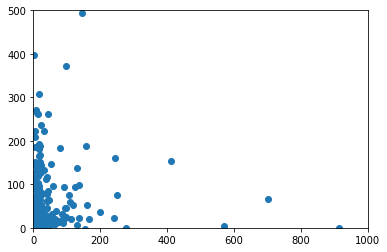

In [ ]:
plt.scatter(a['PER'],a['증가율'])
plt.xlim(0,1000)
plt.ylim(0,500)

## 결과

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
year = range(2011,2021,1)

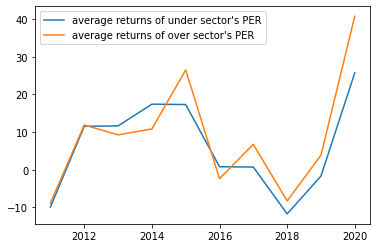

In [ ]:
plt.plot(year,lower_per_returns,label="average returns of under sector's PER")
plt.plot(year,upper_per_returns, label = "average returns of over sector's PER")
plt.legend()
plt.show()

In [ ]:
# 단순산술 연평균 수익 for 업종PER보다 낮은 주식
np.array(lower_per_returns).sum()/len(lower_per_returns)

6.172529039083267

In [ ]:
# 단순산술 연평균 수익 for 업종PER보다 높은 주식
np.array(upper_per_returns).sum()/len(upper_per_returns)

9.024984078876997

결론 : 최근 10년 데이터를 사용하여 업종PER 대비 높은 주식과 낮은 주식의 평균 수익률을 비교해보았다. 그 결과 수익률이 업종 PER보다 높은 주식이 대략 3퍼센트 높았다. 고로 업종PER보다 낮은 PER의 주식을 선택하는 것이 좋은 것인가에 대해 다시한번 생각해볼 필요가 있다. 

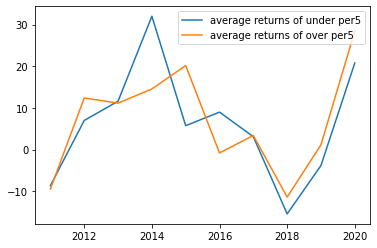

In [ ]:
# per5 이하와 5이상 주식들의 평균수익률
plt.plot(year,under5_per_returns,label="average returns of under per5")
plt.plot(year,upper5_per_returns, label = "average returns of over per5")
plt.legend()
plt.show()

In [ ]:
# per5이하 단순 산술 평균 
np.array(under5_per_returns).sum()/len(under5_per_returns)

6.120272498664884

In [ ]:
# per5이상 단순 산술 평균
np.array(upper5_per_returns).sum()/len(upper5_per_returns)

6.948922711216683

In [ ]:
lower_per_returns 
upper_per_returns
under5_per_returns
upper5_per_returns 
under2_per_returns 
upper10_per_returns
upper50_per_returns

[-10.098507137310216,
 1.5088667850308122,
 -8.728727021062106,
 16.168389276421554,
 38.92470310240743,
 -0.48972332761779863,
 2.985909570117709,
 -7.539355612914269,
 -6.495709690733142,
 64.05756362895508]

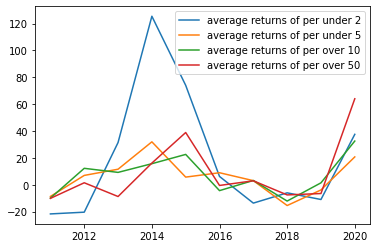

In [ ]:
plt.plot(year,under2_per_returns,label="average returns of per under 2")
plt.plot(year,under5_per_returns,label="average returns of per under 5")
plt.plot(year,upper10_per_returns,label="average returns of per over 10")
plt.plot(year,upper50_per_returns,label="average returns of per over 50")
plt.legend()
plt.show()

In [ ]:
# per2이하 단순 산술 평균 
np.array(under2_per_returns).sum()/len(under2_per_returns)

20.219751400027242

In [ ]:
# per5이하 단순 산술 평균 
np.array(under5_per_returns).sum()/len(under5_per_returns)

6.120272498664884

In [ ]:
# per10이상 단순 산술 평균 
np.array(upper10_per_returns).sum()/len(upper10_per_returns)

7.074559329987042

In [ ]:
# per50이상 단순 산술 평균 
np.array(upper50_per_returns).sum()/len(upper50_per_returns)

9.029340957329506

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51061 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/bac

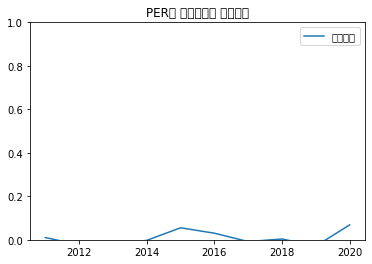

In [ ]:
plt.plot(year,per_returns_corr,label = '상관관계')
plt.title('PER과 수익률간의 상관관계')
plt.ylim(0,1)
plt.legend()
plt.show()

In [ ]:
per_returns_corr

[array([0.0102598]),
 array([-0.02276642]),
 array([-0.02060888]),
 array([-0.00252153]),
 array([0.05517497]),
 array([0.0303681]),
 array([-0.00819086]),
 array([0.00378815]),
 array([-0.02869591]),
 array([0.06868564])]

# PBR

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
ls -all ../gdrive/MyDrive/PER_Provement/jongmok_upjong/

total 614
-rw------- 1 root root 57194 Mar 26 10:35 jongmok_upjong_2011.xlsx
-rw------- 1 root root 58002 Mar 26 10:29 jongmok_upjong_2012.xlsx
-rw------- 1 root root 57383 Mar 26 10:29 jongmok_upjong_2013.xlsx
-rw------- 1 root root 57065 Mar 26 10:30 jongmok_upjong_2014.xlsx
-rw------- 1 root root 55940 Mar 26 10:31 jongmok_upjong_2015.xlsx
-rw------- 1 root root 55725 Mar 26 10:31 jongmok_upjong_2016.xlsx
-rw------- 1 root root 55936 Mar 26 10:31 jongmok_upjong_2017.xlsx
-rw------- 1 root root 55609 Mar 26 10:31 jongmok_upjong_2018.xlsx
-rw------- 1 root root 56859 Mar 26 10:32 jongmok_upjong_2019.xlsx
-rw------- 1 root root 57558 Mar 26 10:32 jongmok_upjong_2020.xlsx
-rw------- 1 root root 58027 Mar 26 11:51 jongmok_upjong_2021.xlsx


In [ ]:
# for문 돌려서 엑셀파일 열기위한 경로 설정
import os

PATH = '../gdrive/MyDrive/PER_Provement/price_per/'

file_list= []
for (root, directories, files) in os.walk(PATH):
    for file in files:
#         print(files)
        file_path = os.path.join(root, file)
        file_list.append(file_path)

In [ ]:
for file in file_list:
  # print(file[-13:-9])
  df = pd.read_excel(file)[['종목코드', '종목명','PBR']]
  exec(f'pbr_{file[-13:-9]} =df')

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
# for문 돌려서 엑셀파일 열기위한 경로 설정
import os

PATH = '../gdrive/MyDrive/PER_Provement/jongmok_upjong/'

file_list= []
for (root, directories, files) in os.walk(PATH):
    for file in files:
#         print(files)
        file_path = os.path.join(root, file)
        file_list.append(file_path)

In [ ]:
for file in file_list:
  # print(file[-9:-5])
  df = pd.read_excel(file)[['종목코드', '종목명','업종명','종가']]
  exec(f'jongmok_upjong{file[-9:-5]} =df')

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
# for문 돌려서 엑셀파일 열기위한 경로 설정
import os

PATH = '../gdrive/MyDrive/PER_Provement/upjong/'

file_list= []
for (root, directories, files) in os.walk(PATH):
    for file in files:
#         print(files)
        file_path = os.path.join(root, file)
        file_list.append(file_path)

In [ ]:
for file in file_list:
  # print(file[-19:-15])
  df = pd.read_excel(file)[['지수명','PBR']]
  df = df.rename(columns = {'지수명':'업종명',
                       'PBR':'업종PBR'})
  exec(f'upjong{file[-19:-15]} =df')

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
lower_pbr_returns = []
upper_pbr_returns = []
under02_pbr_returns = []
under1_pbr_returns = []
upper1_pbr_returns = []
upper5_pbr_returns= []
pbr_returns_corr = []

## 2011

In [ ]:
join_t1 = pd.merge(pbr_2011,jongmok_upjong2011,how='left',on='종목코드')[['종목코드','종목명_x','업종명','PBR','종가']]
join_t1.columns = ['종목코드','종목명','업종명','PBR','종가']
join_t2 = pd.merge(join_t1,upjong2011,how='left',on='업종명')

In [ ]:
join_t2['PBR'] = join_t2['PBR'].apply(lambda x : '0' if x=='-' else x)
join_t2['PBR'] = join_t2['PBR'].astype(float)

In [ ]:
join_t2['업종PBR'] = join_t2['업종PBR'].apply(lambda x : '0' if x =='-' else x)
join_t2['업종PBR'] = join_t2['업종PBR'].astype(float)
print('전처리전 코스피 종목 갯수 : {}'.format(len(join_t2)))

전처리전 코스피 종목 갯수 : 872


In [ ]:
join_t2 = join_t2.loc[~((join_t2['PBR']==0) | (join_t2['업종PBR']==0))] # PBR이나 업종PBR이 0인 종목을 제외한 종목(872종목에서 >>702종목)
print('전처리 후 코스피 종목 갯수 : {}'.format(len(join_t2)))

전처리 후 코스피 종목 갯수 : 702


In [ ]:
lower_upjong = join_t2.loc[join_t2['PBR'] <join_t2['업종PBR']] # 업종pbr보다 낮은 pbr주식
comp1112 = pd.merge(lower_upjong, jongmok_upjong2012, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
lower_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

-4.830978810137763


In [ ]:
over_upjong = join_t2.loc[join_t2['PBR'] >join_t2['업종PBR']] # 업종pbr보다 높은 pbr주식
comp1112 = pd.merge(over_upjong, jongmok_upjong2012, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

-8.256433116019416


In [ ]:
under02_upjong = join_t2.loc[join_t2['PBR'] <0.2] # pbr이 0.2보다 낮은 주식
comp1112 = pd.merge(under02_upjong, jongmok_upjong2012, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
under02_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

25.502445002042254


In [ ]:
under1_upjong = join_t2.loc[join_t2['PBR'] <1] # pbr이 1보다 주식
comp1112 = pd.merge(under1_upjong, jongmok_upjong2012, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
under1_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

-3.6143198581159037


In [ ]:
upper1_pbr = join_t2.loc[join_t2['PBR'] >1] # pbr이 1보다 높은 주식
comp1112 = pd.merge(upper1_pbr, jongmok_upjong2012, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper1_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

-8.614999214603923


In [ ]:
upper5_pbr = join_t2.loc[join_t2['PBR'] > 5] # pbr이 5보다 높은 주식
comp1112 = pd.merge(upper5_pbr, jongmok_upjong2012, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper5_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

-16.314647229122453


In [ ]:
a = pd.merge(join_t2.sort_values('PBR'), jongmok_upjong2012, how='left', on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '업종PBR','종가_x','종가_y']]
a.columns = ['종목코드', '종목명', '업종명', 'PBR', '업종PBR','종가','다음해종가']
a['증가율'] = ((a['다음해종가']-a['종가'])/a['종가'])*100
a = a.loc[~a['다음해종가'].isnull()]
pbr_returns_corr_score = a.corr()['증가율'].to_frame()
pbr_returns_corr.append(pbr_returns_corr_score.loc[(pbr_returns_corr_score.index=='PBR')]['증가율'].values)
pbr_returns_corr_score

,증가율
PBR,-0.046174
업종PBR,-0.020344
종가,-0.004088
다음해종가,0.051877
증가율,1.000000


In [ ]:
a.loc['']

,종목코드,종목명,업종명,PBR,업종PBR,종가,다음해종가,증가율
0,009320,대우부품,전기전자,0.05,1.87,2025.0,740.0,-63.456790
1,004550,대우차판매,유통업,0.08,1.39,2250.0,1190.0,-47.111111
2,006390,현대시멘트,비금속광물,0.09,0.56,6940.0,5940.0,-14.409222
3,015110,중앙건설,건설업,0.09,1.18,2705.0,1200.0,-55.637708
4,001310,풍림산업,건설업,0.12,1.18,2090.0,1325.0,-36.602871
...,...,...,...,...,...,...,...,...
697,130660,한전산업,서비스업,9.21,1.78,15100.0,6730.0,-55.430464
698,051900,LG생활건강,화학,9.58,2.34,398000.0,479500.0,20.477387
699,005690,에프씨비투웰브,섬유의복,10.32,0.79,74600.0,12800.0,-82.841823
700,052690,한전기술,서비스업,10.72,1.78,89700.0,93000.0,3.678930


## 2012

In [ ]:
join_t1 = pd.merge(pbr_2012,jongmok_upjong2012,how='left',on='종목코드')[['종목코드','종목명_x','업종명','PBR','종가']]
join_t1.columns = ['종목코드','종목명','업종명','PBR','종가']
join_t2 = pd.merge(join_t1,upjong2012,how='left',on='업종명')

In [ ]:
join_t2['PBR'] = join_t2['PBR'].apply(lambda x : '0' if x=='-' else x)
join_t2['PBR'] = join_t2['PBR'].astype(float)

In [ ]:
join_t2['업종PBR'] = join_t2['업종PBR'].apply(lambda x : '0' if x =='-' else x)
join_t2['업종PBR'] = join_t2['업종PBR'].astype(float)
print('전처리 하기 전 코스피 종목 수 : {}'.format(len(join_t2)))

전처리 하기 전 코스피 종목 수 : 882


In [ ]:
join_t2 = join_t2.loc[~((join_t2['업종PBR']==0) | (join_t2['PBR']==0))] # PBR이나 업종PBR이 0인 종목을 제외한 종목
print('전처리 한 후 코스피 종목 수 : {}'.format(len(join_t2)))

전처리 한 후 코스피 종목 수 : 718


In [ ]:
lower_upjong = join_t2.loc[join_t2['업종PBR'] >join_t2['PBR']] # 업종pbr보다 낮은 pbr주식
comp1112 = pd.merge(lower_upjong, jongmok_upjong2013, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
lower_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

20.119533470658595


In [ ]:
over_upjong = join_t2.loc[join_t2['PBR'] >join_t2['업종PBR']] # 업종pbr보다 높은 pbr주식
comp1112 = pd.merge(over_upjong, jongmok_upjong2013, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

1.4545224648176274


In [ ]:
under02_upjong = join_t2.loc[join_t2['PBR'] <0.2] # pbr이 0.2보다 낮은 주식
comp1112 = pd.merge(under02_upjong, jongmok_upjong2013, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
under02_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

95.5126306692384


In [ ]:
under1_upjong = join_t2.loc[join_t2['PBR'] <1] # PBR이 1보다 낮은 주식
comp1112 = pd.merge(under1_upjong, jongmok_upjong2013, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
under1_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

21.079699769726062


In [ ]:
upper1_pbr = join_t2.loc[join_t2['PBR']>1] # pbr이 1보다 높은
comp1112 = pd.merge(upper1_pbr, jongmok_upjong2013, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper1_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

2.330416256476005


In [ ]:
upper5_pbr = join_t2.loc[join_t2['PBR'] > 5] #  pbr이 5보다 높은
comp1112 = pd.merge(upper5_pbr, jongmok_upjong2013, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper5_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

-5.4721121043494705


In [ ]:
a = pd.merge(join_t2.sort_values('PBR'), jongmok_upjong2013, how='left', on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '업종PBR','종가_x','종가_y']]
a.columns = ['종목코드', '종목명', '업종명', 'PBR', '업종PBR','종가','다음해종가']
a['증가율'] = ((a['다음해종가']-a['종가'])/a['종가'])*100
a = a.loc[~a['다음해종가'].isnull()]
pbr_returns_corr_score = a.corr()['증가율'].to_frame()
pbr_returns_corr.append(pbr_returns_corr_score.loc[(pbr_returns_corr_score.index=='PBR')]['증가율'].values)
pbr_returns_corr_score

,증가율
PBR,-0.071903
업종PBR,-0.009932
종가,-0.016346
다음해종가,0.016401
증가율,1.000000


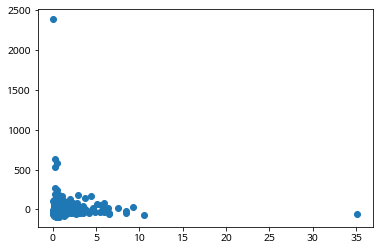

In [ ]:
plt.scatter(a['PBR'],a['증가율'])

In [ ]:
a.loc[a['증가율']>2000]

,종목코드,종목명,업종명,PBR,업종PBR,종가,다음해종가,증가율
2,002410,범양건영,건설업,0.08,0.96,1520.0,37800.0,2386.842105


In [ ]:
jongmok_upjong2012[jongmok_upjong2012['종목명']=='범양건영']

,종목코드,종목명,업종명,종가
386,002410,범양건영,건설업,1520.0


## 2013

In [ ]:
join_t1 = pd.merge(pbr_2013,jongmok_upjong2013,how='left',on='종목코드')[['종목코드','종목명_x','업종명','PBR','종가']]
join_t1.columns = ['종목코드','종목명','업종명','PBR','종가']
join_t2 = pd.merge(join_t1,upjong2013,how='left',on='업종명')

In [ ]:
join_t2['PBR'] = join_t2['PBR'].apply(lambda x : '0' if x=='-' else x)
join_t2['PBR'] = join_t2['PBR'].astype(float)

In [ ]:
join_t2['업종PBR'] = join_t2['업종PBR'].apply(lambda x : '0' if x =='-' else x)
join_t2['업종PBR'] = join_t2['업종PBR'].astype(float)
print('전처리 하기 전 코스피 종목 수 : {}'.format(len(join_t2)))

전처리 하기 전 코스피 종목 수 : 875


In [ ]:
join_t2 = join_t2.loc[~((join_t2['업종PBR']==0) | (join_t2['PBR']==0))] # PBR이나 업종PBR이 0인 종목을 제외한 종목
print('전처리 한 후 코스피 종목 수 : {}'.format(len(join_t2)))

전처리 한 후 코스피 종목 수 : 723


In [ ]:
lower_upjong = join_t2.loc[join_t2['업종PBR'] >join_t2['PBR']] # 업종pbr보다 낮은 pbr주식
comp1112 = pd.merge(lower_upjong, jongmok_upjong2014, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
lower_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

16.71198506108042


In [ ]:
over_upjong = join_t2.loc[join_t2['PBR'] >join_t2['업종PBR']] # 업종pbr보다 높은 pbr주식
comp1112 = pd.merge(over_upjong, jongmok_upjong2014, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

6.613124749176684


In [ ]:
under02_upjong = join_t2.loc[join_t2['PBR'] <0.2] # pbr이 0.2보다 낮은 주식
comp1112 = pd.merge(under02_upjong, jongmok_upjong2014, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
under02_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

85.49654994927494


In [ ]:
under1_upjong = join_t2.loc[join_t2['PBR'] <1] # PBR이 1보다 낮은 주식
comp1112 = pd.merge(under1_upjong, jongmok_upjong2014, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
under1_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

14.276546031434709


In [ ]:
upper1_pbr = join_t2.loc[join_t2['PBR']>1] # pbr이 1보다 높은
comp1112 = pd.merge(upper1_pbr, jongmok_upjong2014, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper1_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

13.47365147604726


In [ ]:
upper5_pbr = join_t2.loc[join_t2['PBR'] > 5] #  pbr이 5보다 높은
comp1112 = pd.merge(upper5_pbr, jongmok_upjong2014, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper5_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

3.2604152169355594


In [ ]:
a = pd.merge(join_t2.sort_values('PBR'), jongmok_upjong2014, how='left', on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '업종PBR','종가_x','종가_y']]
a.columns = ['종목코드', '종목명', '업종명', 'PBR', '업종PBR','종가','다음해종가']
a['증가율'] = ((a['다음해종가']-a['종가'])/a['종가'])*100
a = a.loc[~a['다음해종가'].isnull()]
pbr_returns_corr_score = a.corr()['증가율'].to_frame()
pbr_returns_corr.append(pbr_returns_corr_score.loc[(pbr_returns_corr_score.index=='PBR')]['증가율'].values)
pbr_returns_corr_score

,증가율
PBR,-0.050151
업종PBR,-0.004459
종가,-0.028864
다음해종가,0.011172
증가율,1.000000


## 2014

In [ ]:
join_t1 = pd.merge(pbr_2014,jongmok_upjong2014,how='left',on='종목코드')[['종목코드','종목명_x','업종명','PBR','종가']]
join_t1.columns = ['종목코드','종목명','업종명','PBR','종가']
join_t2 = pd.merge(join_t1,upjong2014,how='left',on='업종명')

In [ ]:
join_t2['PBR'] = join_t2['PBR'].apply(lambda x : '0' if x=='-' else x)
join_t2['PBR'] = join_t2['PBR'].astype(float)

In [ ]:
join_t2['업종PBR'] = join_t2['업종PBR'].apply(lambda x : '0' if x =='-' else x)
join_t2['업종PBR'] = join_t2['업종PBR'].astype(float)
print('전처리 하기 전 코스피 종목 수 : {}'.format(len(join_t2)))

전처리 하기 전 코스피 종목 수 : 865


In [ ]:
join_t2 = join_t2.loc[~((join_t2['업종PBR']==0) | (join_t2['PBR']==0))] # PBR이나 업종PBR이 0인 종목을 제외한 종목
print('전처리 한 후 코스피 종목 수 : {}'.format(len(join_t2)))

전처리 한 후 코스피 종목 수 : 710


In [ ]:
lower_upjong = join_t2.loc[join_t2['업종PBR'] >join_t2['PBR']] # 업종pbr보다 낮은 pbr주식
comp1112 = pd.merge(lower_upjong, jongmok_upjong2015, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
lower_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

25.57279061308115


In [ ]:
over_upjong = join_t2.loc[join_t2['PBR'] >join_t2['업종PBR']] # 업종pbr보다 높은 pbr주식
comp1112 = pd.merge(over_upjong, jongmok_upjong2015, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

15.917661735378497


In [ ]:
under02_upjong = join_t2.loc[join_t2['PBR'] <0.2] # pbr이 0.2보다 낮은 주식
comp1112 = pd.merge(under02_upjong, jongmok_upjong2015, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
under02_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

24.733995980950542


In [ ]:
under1_upjong = join_t2.loc[join_t2['PBR'] <1] # PBR이 1보다 낮은 주식
comp1112 = pd.merge(under1_upjong, jongmok_upjong2015, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
under1_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

23.564500516945955


In [ ]:
upper1_pbr = join_t2.loc[join_t2['PBR']>1] # pbr이 1보다 높은
comp1112 = pd.merge(upper1_pbr, jongmok_upjong2015, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper1_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

23.470510343262735


In [ ]:
upper5_pbr = join_t2.loc[join_t2['PBR'] > 5] #  pbr이 5보다 높은
comp1112 = pd.merge(upper5_pbr, jongmok_upjong2015, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper5_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

8.51455103215505


In [ ]:
a = pd.merge(join_t2.sort_values('PBR'), jongmok_upjong2015, how='left', on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '업종PBR','종가_x','종가_y']]
a.columns = ['종목코드', '종목명', '업종명', 'PBR', '업종PBR','종가','다음해종가']
a['증가율'] = ((a['다음해종가']-a['종가'])/a['종가'])*100
a = a.loc[~a['다음해종가'].isnull()]
pbr_returns_corr_score = a.corr()['증가율'].to_frame()
pbr_returns_corr.append(pbr_returns_corr_score.loc[(pbr_returns_corr_score.index=='PBR')]['증가율'].values)
pbr_returns_corr_score

,증가율
PBR,-0.035492
업종PBR,-0.011181
종가,-0.061133
다음해종가,0.002804
증가율,1.000000


## 2015

In [ ]:
join_t1 = pd.merge(pbr_2015,jongmok_upjong2015,how='left',on='종목코드')[['종목코드','종목명_x','업종명','PBR','종가']]
join_t1.columns = ['종목코드','종목명','업종명','PBR','종가']
join_t2 = pd.merge(join_t1,upjong2015,how='left',on='업종명')

In [ ]:
join_t2['PBR'] = join_t2['PBR'].apply(lambda x : '0' if x=='-' else x)
join_t2['PBR'] = join_t2['PBR'].astype(float)

In [ ]:
join_t2['업종PBR'] = join_t2['업종PBR'].apply(lambda x : '0' if x =='-' else x)
join_t2['업종PBR'] = join_t2['업종PBR'].astype(float)
print('전처리 하기 전 코스피 종목 수 : {}'.format(len(join_t2)))

전처리 하기 전 코스피 종목 수 : 854


In [ ]:
join_t2 = join_t2.loc[~((join_t2['업종PBR']==0) | (join_t2['PBR']==0))] # PBR이나 업종PBR이 0인 종목을 제외한 종목
print('전처리 한 후 코스피 종목 수 : {}'.format(len(join_t2)))

전처리 한 후 코스피 종목 수 : 714


In [ ]:
lower_upjong = join_t2.loc[join_t2['업종PBR'] >join_t2['PBR']] # 업종pbr보다 낮은 pbr주식
comp1112 = pd.merge(lower_upjong, jongmok_upjong2016, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
lower_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

29.020907157645887


In [ ]:
over_upjong = join_t2.loc[join_t2['PBR'] >join_t2['업종PBR']] # 업종pbr보다 높은 pbr주식
comp1112 = pd.merge(over_upjong, jongmok_upjong2016, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

31.16231315828137


In [ ]:
under02_upjong = join_t2.loc[join_t2['PBR'] <0.2] # pbr이 0.2보다 낮은 주식
comp1112 = pd.merge(under02_upjong, jongmok_upjong2016, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
under02_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

134.93671556490412


In [ ]:
under1_upjong = join_t2.loc[join_t2['PBR'] <1] # PBR이 1보다 낮은 주식
comp1112 = pd.merge(under1_upjong, jongmok_upjong2016, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
under1_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

24.65641866593722


In [ ]:
upper1_pbr = join_t2.loc[join_t2['PBR']>1] # pbr이 1보다 높은
comp1112 = pd.merge(upper1_pbr, jongmok_upjong2016, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper1_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

33.09837659942185


In [ ]:
upper5_pbr = join_t2.loc[join_t2['PBR'] > 5] #  pbr이 5보다 높은
comp1112 = pd.merge(upper5_pbr, jongmok_upjong2016, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper5_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

10.178912681227722


In [ ]:
a = pd.merge(join_t2.sort_values('PBR'), jongmok_upjong2016, how='left', on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '업종PBR','종가_x','종가_y']]
a.columns = ['종목코드', '종목명', '업종명', 'PBR', '업종PBR','종가','다음해종가']
a['증가율'] = ((a['다음해종가']-a['종가'])/a['종가'])*100
a = a.loc[~a['다음해종가'].isnull()]
pbr_returns_corr_score = a.corr()['증가율'].to_frame()
pbr_returns_corr.append(pbr_returns_corr_score.loc[(pbr_returns_corr_score.index=='PBR')]['증가율'].values)
pbr_returns_corr_score

,증가율
PBR,0.006152
업종PBR,0.041093
종가,-0.081424
다음해종가,0.048410
증가율,1.000000


## 2016

In [ ]:
join_t1 = pd.merge(pbr_2016,jongmok_upjong2016,how='left',on='종목코드')[['종목코드','종목명_x','업종명','PBR','종가']]
join_t1.columns = ['종목코드','종목명','업종명','PBR','종가']
join_t2 = pd.merge(join_t1,upjong2016,how='left',on='업종명')

In [ ]:
join_t2['PBR'] = join_t2['PBR'].apply(lambda x : '0' if x=='-' else x)
join_t2['PBR'] = join_t2['PBR'].astype(float)

In [ ]:
join_t2['업종PBR'] = join_t2['업종PBR'].apply(lambda x : '0' if x =='-' else x)
join_t2['업종PBR'] = join_t2['업종PBR'].astype(float)
print('전처리 하기 전 코스피 종목 수 : {}'.format(len(join_t2)))

전처리 하기 전 코스피 종목 수 : 854


In [ ]:
join_t2 = join_t2.loc[~((join_t2['업종PBR']==0) | (join_t2['PBR']==0))] # PBR이나 업종PBR이 0인 종목을 제외한 종목
print('전처리 한 후 코스피 종목 수 : {}'.format(len(join_t2)))

전처리 한 후 코스피 종목 수 : 729


In [ ]:
lower_upjong = join_t2.loc[join_t2['업종PBR'] >join_t2['PBR']] # 업종pbr보다 낮은 pbr주식
comp1112 = pd.merge(lower_upjong, jongmok_upjong2017, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
lower_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

6.189604246475087


In [ ]:
over_upjong = join_t2.loc[join_t2['PBR'] >join_t2['업종PBR']] # 업종pbr보다 높은 pbr주식
comp1112 = pd.merge(over_upjong, jongmok_upjong2017, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

-0.9567834250482917


In [ ]:
under02_upjong = join_t2.loc[join_t2['PBR'] <0.2] # pbr이 0.2보다 낮은 주식
comp1112 = pd.merge(under02_upjong, jongmok_upjong2017, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
under02_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

26.95167675797683


In [ ]:
under1_upjong = join_t2.loc[join_t2['PBR'] <1] # PBR이 1보다 낮은 주식
comp1112 = pd.merge(under1_upjong, jongmok_upjong2017, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
under1_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

10.235656654328421


In [ ]:
upper1_pbr = join_t2.loc[join_t2['PBR']>1] # pbr이 1보다 높은
comp1112 = pd.merge(upper1_pbr, jongmok_upjong2017, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper1_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

0.31561357873022455


In [ ]:
upper5_pbr = join_t2.loc[join_t2['PBR'] > 5] #  pbr이 5보다 높은
comp1112 = pd.merge(upper5_pbr, jongmok_upjong2017, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper5_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

-6.758921216878057


In [ ]:
a = pd.merge(join_t2.sort_values('PBR'), jongmok_upjong2017, how='left', on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '업종PBR','종가_x','종가_y']]
a.columns = ['종목코드', '종목명', '업종명', 'PBR', '업종PBR','종가','다음해종가']
a['증가율'] = ((a['다음해종가']-a['종가'])/a['종가'])*100
a = a.loc[~a['다음해종가'].isnull()]
pbr_returns_corr_score = a.corr()['증가율'].to_frame()
pbr_returns_corr.append(pbr_returns_corr_score.loc[(pbr_returns_corr_score.index=='PBR')]['증가율'].values)
pbr_returns_corr_score

,증가율
PBR,-0.086639
업종PBR,-0.064255
종가,-0.123269
다음해종가,-0.027298
증가율,1.000000


## 2017

In [ ]:
join_t1 = pd.merge(pbr_2017,jongmok_upjong2017,how='left',on='종목코드')[['종목코드','종목명_x','업종명','PBR','종가']]
join_t1.columns = ['종목코드','종목명','업종명','PBR','종가']
join_t2 = pd.merge(join_t1,upjong2017,how='left',on='업종명')

In [ ]:
join_t2['PBR'] = join_t2['PBR'].apply(lambda x : '0' if x=='-' else x)
join_t2['PBR'] = join_t2['PBR'].astype(float)

In [ ]:
join_t2['업종PBR'] = join_t2['업종PBR'].apply(lambda x : '0' if x =='-' else x)
join_t2['업종PBR'] = join_t2['업종PBR'].astype(float)
print('전처리 하기 전 코스피 종목 수 : {}'.format(len(join_t2)))

전처리 하기 전 코스피 종목 수 : 861


In [ ]:
join_t2 = join_t2.loc[~((join_t2['업종PBR']==0) | (join_t2['PBR']==0))] # PBR이나 업종PBR이 0인 종목을 제외한 종목
print('전처리 한 후 코스피 종목 수 : {}'.format(len(join_t2)))

전처리 한 후 코스피 종목 수 : 740


In [ ]:
lower_upjong = join_t2.loc[join_t2['업종PBR'] >join_t2['PBR']] # 업종pbr보다 낮은 pbr주식
comp1112 = pd.merge(lower_upjong, jongmok_upjong2018, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
lower_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

12.05200805500173


In [ ]:
over_upjong = join_t2.loc[join_t2['PBR'] >join_t2['업종PBR']] # 업종pbr보다 높은 pbr주식
comp1112 = pd.merge(over_upjong, jongmok_upjong2018, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

2.9819147346817756


In [ ]:
under02_upjong = join_t2.loc[join_t2['PBR'] <0.2] # pbr이 0.2보다 낮은 주식
comp1112 = pd.merge(under02_upjong, jongmok_upjong2018, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
under02_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

-9.540117416829744


In [ ]:
under1_upjong = join_t2.loc[join_t2['PBR'] <1] # PBR이 1보다 낮은 주식
comp1112 = pd.merge(under1_upjong, jongmok_upjong2018, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
under1_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

10.415852189998244


In [ ]:
upper1_pbr = join_t2.loc[join_t2['PBR']>1] # pbr이 1보다 높은
comp1112 = pd.merge(upper1_pbr, jongmok_upjong2018, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper1_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

6.074277747018664


In [ ]:
upper5_pbr = join_t2.loc[join_t2['PBR'] > 5] #  pbr이 5보다 높은
comp1112 = pd.merge(upper5_pbr, jongmok_upjong2018, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper5_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

6.988500898468591


In [ ]:
a = pd.merge(join_t2.sort_values('PBR'), jongmok_upjong2018, how='left', on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '업종PBR','종가_x','종가_y']]
a.columns = ['종목코드', '종목명', '업종명', 'PBR', '업종PBR','종가','다음해종가']
a['증가율'] = ((a['다음해종가']-a['종가'])/a['종가'])*100
a = a.loc[~a['다음해종가'].isnull()]
pbr_returns_corr_score = a.corr()['증가율'].to_frame()
pbr_returns_corr.append(pbr_returns_corr_score.loc[(pbr_returns_corr_score.index=='PBR')]['증가율'].values)
pbr_returns_corr_score

,증가율
PBR,-0.013128
업종PBR,0.074955
종가,0.000174
다음해종가,0.068355
증가율,1.000000


## 2018

In [ ]:
join_t1 = pd.merge(pbr_2018,jongmok_upjong2018,how='left',on='종목코드')[['종목코드','종목명_x','업종명','PBR','종가']]
join_t1.columns = ['종목코드','종목명','업종명','PBR','종가']
join_t2 = pd.merge(join_t1,upjong2018,how='left',on='업종명')

In [ ]:
join_t2['PBR'] = join_t2['PBR'].apply(lambda x : '0' if x=='-' else x)
join_t2['PBR'] = join_t2['PBR'].astype(float)

In [ ]:
join_t2['업종PBR'] = join_t2['업종PBR'].apply(lambda x : '0' if x =='-' else x)
join_t2['업종PBR'] = join_t2['업종PBR'].astype(float)
print('전처리 하기 전 코스피 종목 수 : {}'.format(len(join_t2)))

전처리 하기 전 코스피 종목 수 : 869


In [ ]:
join_t2 = join_t2.loc[~((join_t2['업종PBR']==0) | (join_t2['PBR']==0))] # PBR이나 업종PBR이 0인 종목을 제외한 종목
print('전처리 한 후 코스피 종목 수 : {}'.format(len(join_t2)))

전처리 한 후 코스피 종목 수 : 741


In [ ]:
lower_upjong = join_t2.loc[join_t2['업종PBR'] >join_t2['PBR']] # 업종pbr보다 낮은 pbr주식
comp1112 = pd.merge(lower_upjong, jongmok_upjong2019, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
lower_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

-8.998134747517854


In [ ]:
over_upjong = join_t2.loc[join_t2['PBR'] >join_t2['업종PBR']] # 업종pbr보다 높은 pbr주식
comp1112 = pd.merge(over_upjong, jongmok_upjong2019, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

-8.11892615378681


In [ ]:
under02_upjong = join_t2.loc[join_t2['PBR'] <0.2] # pbr이 0.2보다 낮은 주식
comp1112 = pd.merge(under02_upjong, jongmok_upjong2019, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
under02_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

-25.388127853881276


In [ ]:
under1_upjong = join_t2.loc[join_t2['PBR'] <1] # PBR이 1보다 낮은 주식
comp1112 = pd.merge(under1_upjong, jongmok_upjong2019, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
under1_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

-7.352205662973763


In [ ]:
upper1_pbr = join_t2.loc[join_t2['PBR']>1] # pbr이 1보다 높은
comp1112 = pd.merge(upper1_pbr, jongmok_upjong2019, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper1_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

-12.426412526068477


In [ ]:
upper5_pbr = join_t2.loc[join_t2['PBR'] > 5] #  pbr이 5보다 높은
comp1112 = pd.merge(upper5_pbr, jongmok_upjong2019, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper5_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

-13.372239595692024


In [ ]:
a = pd.merge(join_t2.sort_values('PBR'), jongmok_upjong2019, how='left', on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '업종PBR','종가_x','종가_y']]
a.columns = ['종목코드', '종목명', '업종명', 'PBR', '업종PBR','종가','다음해종가']
a['증가율'] = ((a['다음해종가']-a['종가'])/a['종가'])*100
a = a.loc[~a['다음해종가'].isnull()]
pbr_returns_corr_score = a.corr()['증가율'].to_frame()
pbr_returns_corr.append(pbr_returns_corr_score.loc[(pbr_returns_corr_score.index=='PBR')]['증가율'].values)
pbr_returns_corr_score

,증가율
PBR,-0.058346
업종PBR,-0.029749
종가,-0.108283
다음해종가,0.019156
증가율,1.000000


## 2019

In [ ]:
join_t1 = pd.merge(pbr_2019,jongmok_upjong2019,how='left',on='종목코드')[['종목코드','종목명_x','업종명','PBR','종가']]
join_t1.columns = ['종목코드','종목명','업종명','PBR','종가']
join_t2 = pd.merge(join_t1,upjong2019,how='left',on='업종명')

In [ ]:
join_t2['PBR'] = join_t2['PBR'].apply(lambda x : '0' if x=='-' else x)
join_t2['PBR'] = join_t2['PBR'].astype(float)

In [ ]:
join_t2['업종PBR'] = join_t2['업종PBR'].apply(lambda x : '0' if x =='-' else x)
join_t2['업종PBR'] = join_t2['업종PBR'].astype(float)
print('전처리 하기 전 코스피 종목 수 : {}'.format(len(join_t2)))

전처리 하기 전 코스피 종목 수 : 881


In [ ]:
join_t2 = join_t2.loc[~((join_t2['업종PBR']==0) | (join_t2['PBR']==0))] # PBR이나 업종PBR이 0인 종목을 제외한 종목
print('전처리 한 후 코스피 종목 수 : {}'.format(len(join_t2)))

전처리 한 후 코스피 종목 수 : 760


In [ ]:
lower_upjong = join_t2.loc[join_t2['업종PBR'] >join_t2['PBR']] # 업종pbr보다 낮은 pbr주식
comp1112 = pd.merge(lower_upjong, jongmok_upjong2020, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
lower_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

0.18046812699975007


In [ ]:
over_upjong = join_t2.loc[join_t2['PBR'] >join_t2['업종PBR']] # 업종pbr보다 높은 pbr주식
comp1112 = pd.merge(over_upjong, jongmok_upjong2020, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

-0.09790134898158172


In [ ]:
under02_upjong = join_t2.loc[join_t2['PBR'] <0.2] # pbr이 0.2보다 낮은 주식
comp1112 = pd.merge(under02_upjong, jongmok_upjong2020, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
under02_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

-4.133500949085938


In [ ]:
under1_upjong = join_t2.loc[join_t2['PBR'] <1] # PBR이 1보다 낮은 주식
comp1112 = pd.merge(under1_upjong, jongmok_upjong2020, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
under1_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

0.6845457484995365


In [ ]:
upper1_pbr = join_t2.loc[join_t2['PBR']>1] # pbr이 1보다 높은
comp1112 = pd.merge(upper1_pbr, jongmok_upjong2020, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper1_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

-1.826766145358229


In [ ]:
upper5_pbr = join_t2.loc[join_t2['PBR'] > 5] #  pbr이 5보다 높은
comp1112 = pd.merge(upper5_pbr, jongmok_upjong2020, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper5_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

-16.891473017344286


In [ ]:
a = pd.merge(join_t2.sort_values('PBR'), jongmok_upjong2020, how='left', on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '업종PBR','종가_x','종가_y']]
a.columns = ['종목코드', '종목명', '업종명', 'PBR', '업종PBR','종가','다음해종가']
a['증가율'] = ((a['다음해종가']-a['종가'])/a['종가'])*100
a = a.loc[~a['다음해종가'].isnull()]
pbr_returns_corr_score = a.corr()['증가율'].to_frame()
pbr_returns_corr.append(pbr_returns_corr_score.loc[(pbr_returns_corr_score.index=='PBR')]['증가율'].values)
pbr_returns_corr_score

,증가율
PBR,-0.078687
업종PBR,-0.026970
종가,-0.115229
다음해종가,-0.008536
증가율,1.000000


In [ ]:
a

,종목코드,종목명,업종명,PBR,업종PBR,종가,다음해종가,증가율
0,071970,STX중공업,기계,0.12,1.17,5600.0,3185.0,-43.125000
1,011160,두산건설,건설업,0.15,0.84,1470.0,1410.0,-4.081633
2,021820,세원정공,운수장비,0.16,0.53,6760.0,8090.0,19.674556
3,007860,서연,기타금융,0.17,NaN,3660.0,3250.0,-11.202186
4,002300,한국제지,종이목재,0.17,0.61,16500.0,17250.0,4.545455
...,...,...,...,...,...,...,...,...
755,101140,아티스,유통업,10.69,0.84,5120.0,3085.0,-39.746094
756,068270,셀트리온,의약품,11.27,4.62,214500.0,180000.0,-16.083916
757,006490,인스코비,통신업,12.52,0.92,5160.0,3195.0,-38.081395
758,005690,파미셀,의약품,13.35,4.62,12800.0,8660.0,-32.343750


## 2020

In [ ]:
join_t1 = pd.merge(pbr_2020,jongmok_upjong2020,how='left',on='종목코드')[['종목코드','종목명_x','업종명','PBR','종가']]
join_t1.columns = ['종목코드','종목명','업종명','PBR','종가']
join_t2 = pd.merge(join_t1,upjong2020,how='left',on='업종명')

In [ ]:
join_t2['PBR'] = join_t2['PBR'].apply(lambda x : '0' if x=='-' else x)
join_t2['PBR'] = join_t2['PBR'].astype(float)

In [ ]:
join_t2['업종PBR'] = join_t2['업종PBR'].apply(lambda x : '0' if x =='-' else x)
join_t2['업종PBR'] = join_t2['업종PBR'].astype(float)
print('전처리 하기 전 코스피 종목 수 : {}'.format(len(join_t2)))

전처리 하기 전 코스피 종목 수 : 895


In [ ]:
join_t2 = join_t2.loc[~((join_t2['업종PBR']==0) | (join_t2['PBR']==0))] # PBR이나 업종PBR이 0인 종목을 제외한 종목
print('전처리 한 후 코스피 종목 수 : {}'.format(len(join_t2)))

전처리 한 후 코스피 종목 수 : 774


In [ ]:
lower_upjong = join_t2.loc[join_t2['업종PBR'] >join_t2['PBR']] # 업종pbr보다 낮은 pbr주식
comp1112 = pd.merge(lower_upjong, jongmok_upjong2021, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
lower_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

41.2430974991066


In [ ]:
over_upjong = join_t2.loc[join_t2['PBR'] >join_t2['업종PBR']] # 업종pbr보다 높은 pbr주식
comp1112 = pd.merge(over_upjong, jongmok_upjong2021, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

32.593797181679086


In [ ]:
under02_upjong = join_t2.loc[join_t2['PBR'] <0.2] # pbr이 0.2보다 낮은 주식
comp1112 = pd.merge(under02_upjong, jongmok_upjong2021, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
under02_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

35.98263084830306


In [ ]:
under1_upjong = join_t2.loc[join_t2['PBR'] <1] # PBR이 1보다 낮은 주식
comp1112 = pd.merge(under1_upjong, jongmok_upjong2021, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
under1_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

28.114047479324338


In [ ]:
upper1_pbr = join_t2.loc[join_t2['PBR']>1] # pbr이 1보다 높은
comp1112 = pd.merge(upper1_pbr, jongmok_upjong2021, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper1_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

46.796782361167054


In [ ]:
upper5_pbr = join_t2.loc[join_t2['PBR'] > 5] #  pbr이 5보다 높은
comp1112 = pd.merge(upper5_pbr, jongmok_upjong2021, how='left',on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '종가_x', '업종PBR','종가_y']]
comp1112.columns = ['종목코드', '종목명', '업종명', 'PBR', '종가', '업종PBR','다음년도종가']
comp1112['증가율'] = ((comp1112['다음년도종가']-comp1112['종가'])/comp1112['종가'])*100
upper5_pbr_returns.append(comp1112['증가율'].sum()/len(comp1112))
print(comp1112['증가율'].sum()/len(comp1112)) # 평균 기대수익률

20.988443333924785


In [ ]:
a = pd.merge(join_t2.sort_values('PBR'), jongmok_upjong2021, how='left', on = '종목코드')[['종목코드', '종목명_x', '업종명_x', 'PBR', '업종PBR','종가_x','종가_y']]
a.columns = ['종목코드', '종목명', '업종명', 'PBR', '업종PBR','종가','다음해종가']
a['증가율'] = ((a['다음해종가']-a['종가'])/a['종가'])*100
a = a.loc[~a['다음해종가'].isnull()]
pbr_returns_corr_score = a.corr()['증가율'].to_frame()
pbr_returns_corr.append(pbr_returns_corr_score.loc[(pbr_returns_corr_score.index=='PBR')]['증가율'].values)
pbr_returns_corr_score

,증가율
PBR,0.002273
업종PBR,0.152952
종가,-0.040680
다음해종가,0.048182
증가율,1.000000


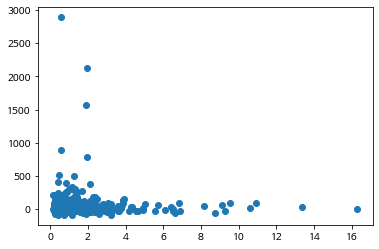

In [ ]:
plt.scatter(a['PBR'],a['증가율'])


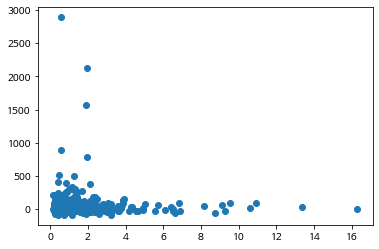

In [ ]:
plt.scatter(a['PBR'],a['증가율'])

## 결과

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
year = range(2011,2021,1)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


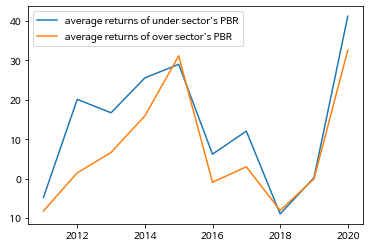

In [ ]:
plt.plot(year,lower_pbr_returns,label="average returns of under sector's PBR")
plt.plot(year,upper_pbr_returns, label = "average returns of over sector's PBR")
plt.legend()
plt.show()

In [ ]:
# 단순산술 연평균 수익 for 업종PBR보다 낮은 주식
np.array(lower_pbr_returns).sum()/len(lower_pbr_returns)

13.726128067239358

In [ ]:
# 단순산술 연평균 수익 for 업종PER보다 높은 주식
np.array(upper_pbr_returns).sum()/len(upper_pbr_returns)

7.329328998017894

결론 : 최근 10년 데이터를 사용하여 업종PER 대비 높은 주식과 낮은 주식의 평균 수익률을 비교해보았다. 그 결과 수익률이 업종 PER보다 높은 주식이 대략 3퍼센트 높았다. 고로 업종PER보다 낮은 PER의 주식을 선택하는 것이 좋은 것인가에 대해 다시한번 생각해볼 필요가 있다. 

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


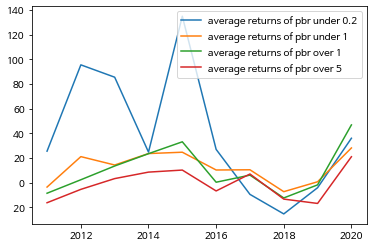

In [ ]:
plt.plot(year,under02_pbr_returns,label="average returns of pbr under 0.2")
plt.plot(year,under1_pbr_returns,label="average returns of pbr under 1")
plt.plot(year,upper1_pbr_returns,label="average returns of pbr over 1")
plt.plot(year,upper5_pbr_returns,label="average returns of pbr over 5")
plt.legend()
plt.show()

In [ ]:
# per2이하 단순 산술 평균 
np.array(under02_pbr_returns).sum()/len(under02_pbr_returns)

39.00548985528932

In [ ]:
# per5이하 단순 산술 평균 
np.array(under1_pbr_returns).sum()/len(under1_pbr_returns)

12.206074153510482

In [ ]:
# per10이상 단순 산술 평균 
np.array(upper1_pbr_returns).sum()/len(upper1_pbr_returns)

10.269145047609317

In [ ]:
# per50이상 단순 산술 평균 
np.array(upper5_pbr_returns).sum()/len(upper5_pbr_returns)

-0.8878570000674586

In [ ]:
pbr_returns_corr

[array([-0.04617391]),
 array([-0.07190265]),
 array([-0.05015108]),
 array([-0.0354918]),
 array([0.00615175]),
 array([-0.08663919]),
 array([-0.01312762]),
 array([-0.05834594]),
 array([-0.07868688]),
 array([0.00227263])]

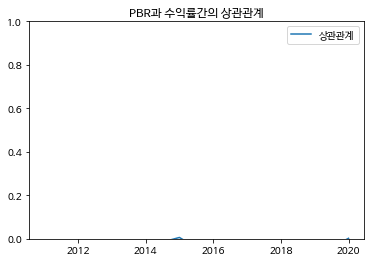

In [ ]:
plt.plot(year,pbr_returns_corr,label = '상관관계')
plt.title('PBR과 수익률간의 상관관계')
plt.ylim(0,1)
plt.legend()
plt.show()